# Exploratory Data Analysis (EDA)

This notebook provides a basic exploratory data analysis for the dataset.

## Steps: 
1. **Basic Summary Statistics**
2. **Visualization of Feature Distributions**
3. **Correlation Analysis**
4. **Discussion of Insights**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '../data/raw/buoydata/past/300025010734900.csv'

df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


,BuoyID,Year,Hour,Min,DOY,POS_DOY,Lat,Lon,BP,Ts,Ta,iIceC,iBP,iTs,iTa_2m,iWindE_0Layer,iWindN_0Layer
0,300025010734900,2024,18,11,244.7578,244.7578,75.50522,-126.27913,995,-999.0,-999.0,0.04,993.41,-0.66,-0.23,11.23,2.77
1,300025010734900,2024,18,50,244.7852,244.7852,75.50835,-126.26226,995,-999.0,-999.0,0.04,993.40,-0.66,-0.23,11.22,2.77
2,300025010734900,2024,19,1,244.7928,244.7928,75.50935,-126.25715,996,-999.0,-999.0,0.04,993.64,-0.67,-0.29,11.24,3.14
3,300025010734900,2024,20,0,244.8340,244.8340,75.51489,-126.22398,996,-999.0,-999.0,0.04,993.86,-0.67,-0.28,11.20,3.43
4,300025010734900,2024,21,1,244.8759,244.8759,75.51951,-126.18479,996,-999.0,-999.0,0.04,994.06,-0.68,-0.32,11.15,3.75


## 1. Basic Summary Statistics

This section provides a basic statistical summary of the dataset, including mean, variance, minimum, and maximum values.


In [2]:
# Summary statistics
summary_stats = df.describe().T
summary_stats['variance'] = df.var()
summary_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'variance']]


,mean,std,min,25%,50%,75%,max,variance
BuoyID,3.000250e+14,0.000000,3.000250e+14,3.000250e+14,3.000250e+14,3.000250e+14,3.000250e+14,0.000000
Year,2.024000e+03,0.000000,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,0.000000
Hour,2.014286e+01,1.951800,1.800000e+01,1.850000e+01,2.000000e+01,2.150000e+01,2.300000e+01,3.809524
Min,9.428571e+00,18.283482,0.000000e+00,1.000000e+00,1.000000e+00,6.500000e+00,5.000000e+01,334.285714
DOY,2.448461e+02,0.074552,2.447578e+02,2.447890e+02,2.448340e+02,2.448971e+02,2.449591e+02,0.005558
POS_DOY,2.448461e+02,0.074552,2.447578e+02,2.447890e+02,2.448340e+02,2.448971e+02,2.449591e+02,0.005558
Lat,7.551434e+01,0.006768,7.550522e+01,7.550885e+01,7.551489e+01,7.552028e+01,7.552201e+01,0.000046
Lon,-1.262068e+02,0.067635,-1.262791e+02,-1.262597e+02,-1.262240e+02,-1.261629e+02,-1.260996e+02,0.004574
BP,9.957143e+02,0.487950,9.950000e+02,9.955000e+02,9.960000e+02,9.960000e+02,9.960000e+02,0.238095
Ts,-9.990000e+02,0.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000


## 2. Visualization of Feature Distributions

This section includes histograms and box plots to show the distribution of key features.


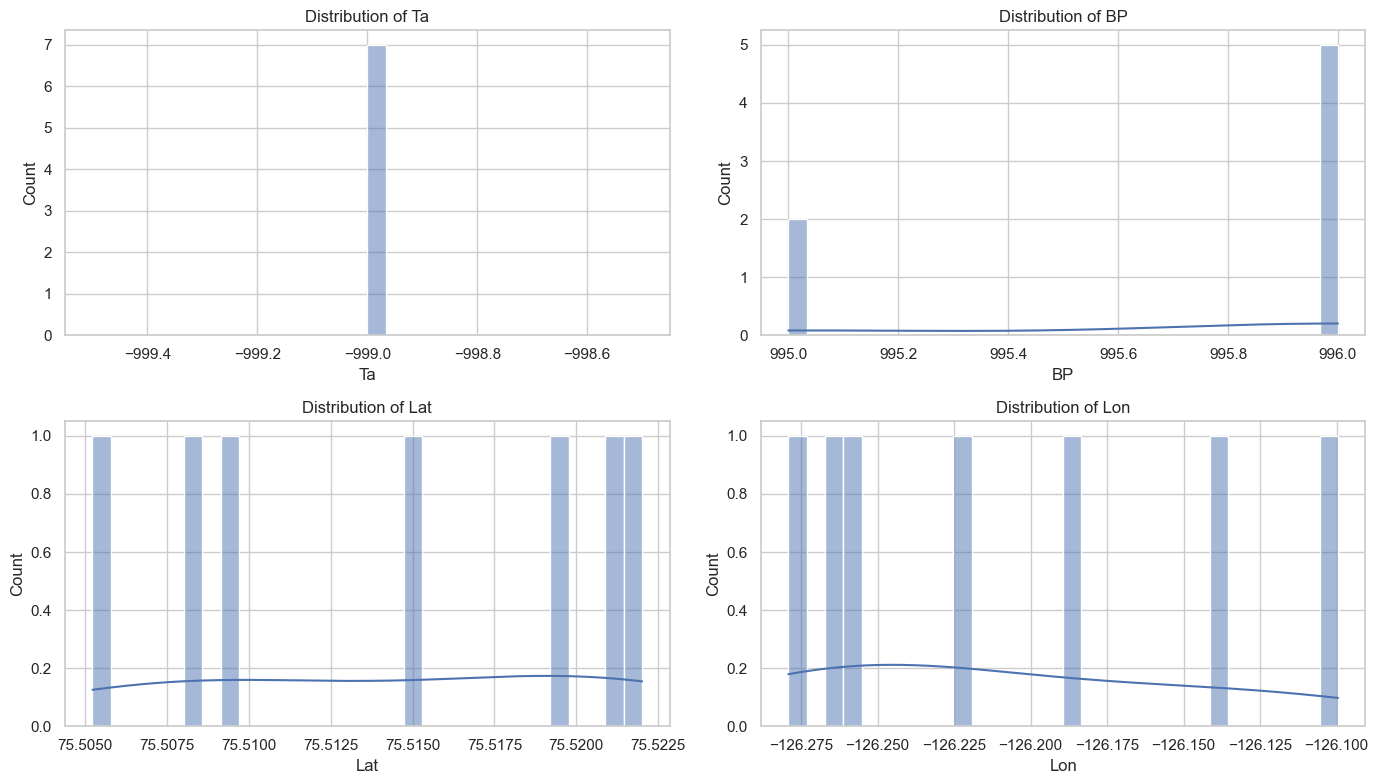

In [3]:
# Set style for seaborn
sns.set(style="whitegrid")

# Plot histograms of selected numerical features
features = ['Ta', 'BP', 'Lat', 'Lon']  # Adjust feature names as necessary
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


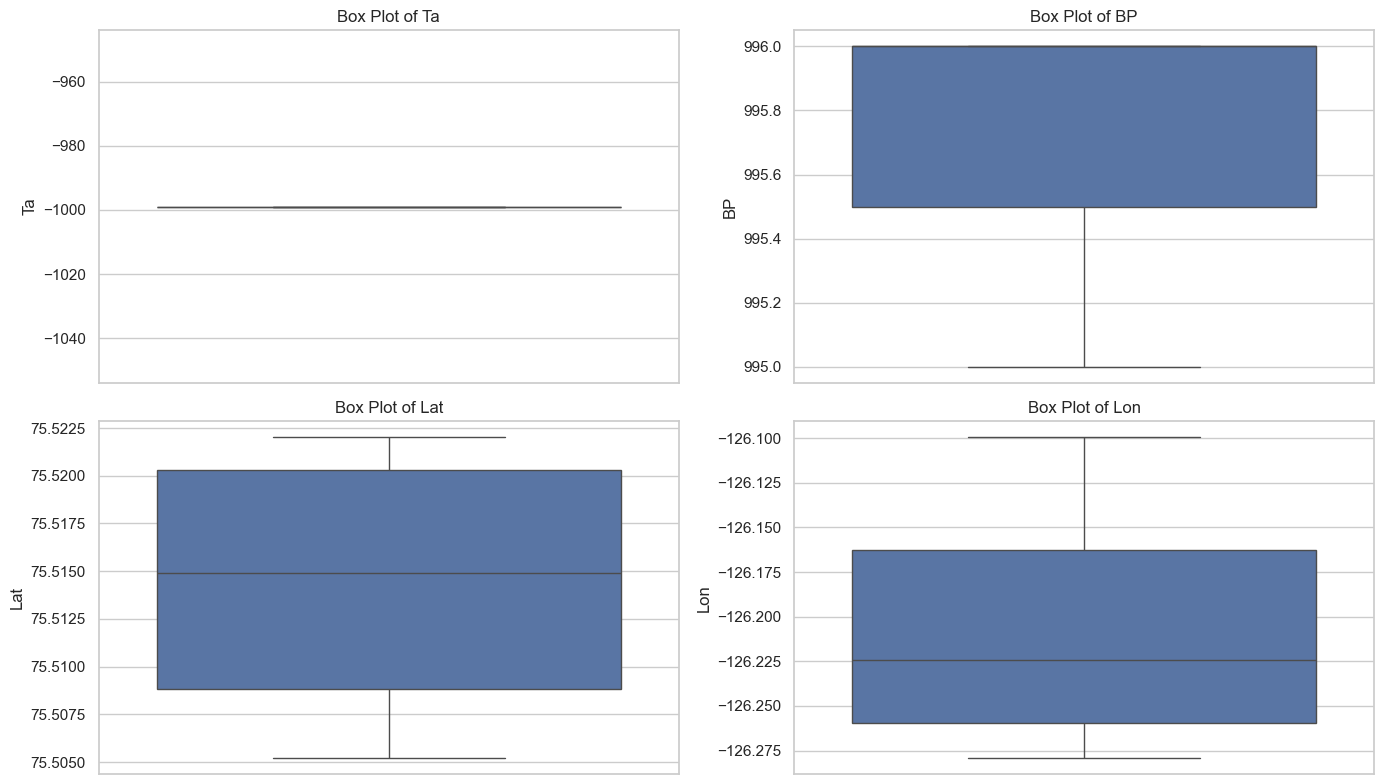

In [4]:
# Box plots for selected features to identify outliers
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


## 3. Correlation Analysis

This section includes a correlation matrix and heatmap to analyze relationships between different features.


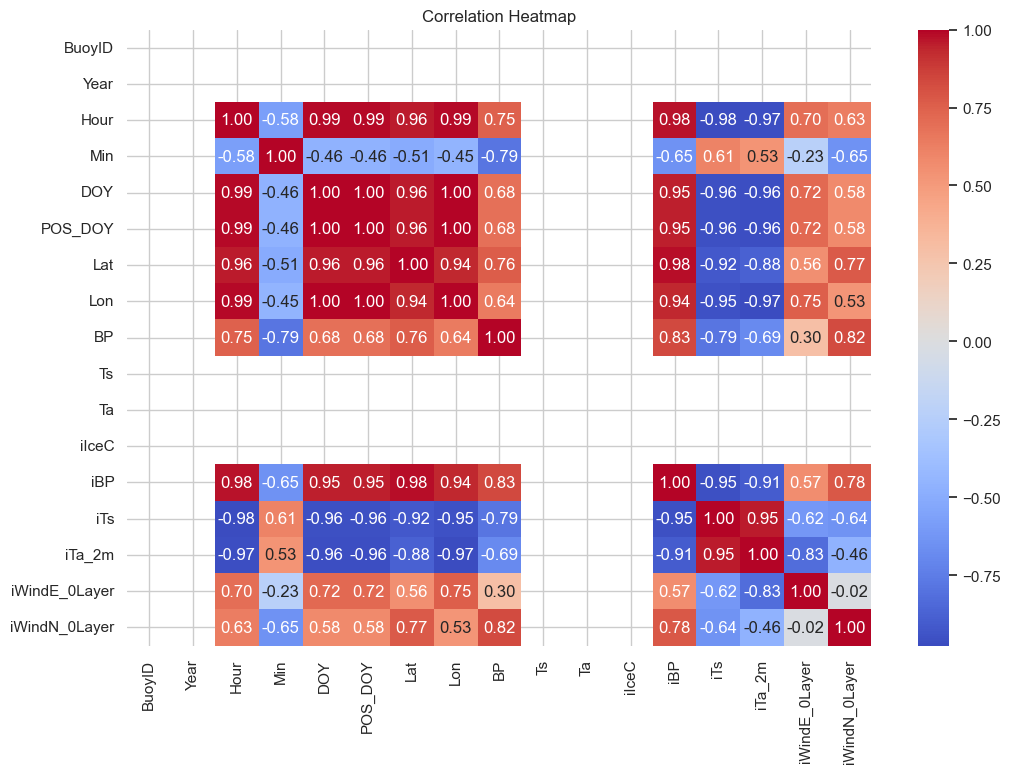

In [5]:
# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## 4. Discussion and Insights

### Feature Distributions Analysis

- **Ta (Air Temperature)**:
  - Shows a uniform value around -999.0
  - Very little variation in the box plot
  - This could indicate sensor issues or missing/default values

- **BP (Barometric Pressure)**:
  - Range approximately between 995.0-996.0 hPa
  - Distribution appears bimodal with peaks at ~995.0 and ~996.0
  - Box plot shows moderate spread with some potential outliers

- **Lat (Latitude)**:
  - Range approximately 75.505° to 75.522°
  - Distribution shows multiple discrete values
  - Suggests measurements taken at specific fixed locations

- **Lon (Longitude)**:
  - Range approximately -126.27° to -126.10°
  - Similar to latitude, shows discrete sampling points
  - Fairly uniform distribution across the range

### Correlation Analysis

**Strong Positive Correlations (>0.9):**
- **Hour** correlates strongly with:
  - **DOY** (0.99)
  - **POS_DOY** (0.99)
  - **Lat** (0.96)
  - **Lon** (0.99)
  - **iBP** (0.98)

- **DOY/POS_DOY** show strong correlations with:
  - Each other (1.00)
  - **Lat** (0.96)
  - **Lon** (1.00)
  - **iBP** (0.95)

**Strong Negative Correlations (<-0.9):**
- **iTs** shows strong negative correlations with:
  - **Hour** (-0.98)
  - **DOY** (-0.96)
  - **POS_DOY** (-0.96)
  - **Lon** (-0.95)
  - **iBP** (-0.95)

- **rTa_2m** shows similar negative correlation patterns

### Key Insights:
- Time-related variables (**Hour**, **DOY**) are highly interconnected with spatial variables (**Lat**, **Lon**), suggesting systematic sampling patterns.
- **BP** (Barometric Pressure) shows moderate correlations (0.64-0.82) with most variables, indicating it is somewhat independent.
- The strong negative correlations with **iTs** and **rTa_2m** suggest these are inverse relationships with temporal measurements.
- **WindE** and **WindN** (wind components) show weaker correlations overall, suggesting more independent behavior.



## 5. Wind Vector Analysis

This section includes the analysis of wind vectors using uwnd and vwnd data from NetCDF files. The data is converted to 3D numpy arrays, and the time variable is transformed to the day of year (DOY). An animation of the wind vectors is created to visualize the changes over time.

In [ ]:
# This script reads the uwnd and vwnd NetCDF files, converts them to 3D numpy arrays, and converts the time variable to day of year (DOY). 
# It then creates an animation of the wind vectors using matplotlib.

# Convert the uwnd and vwnd NetCDF files to 3D numpy arrays and convert the time variable as day of year (DOY) (copied from prepare_ai_ready_data.ipynb)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import netCDF4 as nc
import numpy as np
import datetime

# Open the NetCDF file
file_path = '..\\data\\raw\\reanalyses\\ncep\\uwnd.sfc.2024.nc'
dataset = nc.Dataset(file_path, 'r')

# Extract the uwnd variable
uwnd_var = dataset.variables['uwnd']

# Convert the uwnd variable to a 3D numpy array
uwnd_3d_array = uwnd_var[:]

# Open the vwnd NetCDF file
vwnd_file_path = '..\\data\\raw\\reanalyses\\ncep\\vwnd.sfc.2024.nc'
vwnd_dataset = nc.Dataset(vwnd_file_path, 'r')

# Extract the vwnd variable
vwnd_var = vwnd_dataset.variables['vwnd']

# Convert the vwnd variable to a 3D numpy array
vwnd_3d_array = vwnd_var[:]

# Extract the latitudes and longitudes
latitudes = vwnd_dataset.variables['lat'][:]
longitudes = vwnd_dataset.variables['lon'][:]

# Convert the time variable to day of year (DOY)
time_var = vwnd_dataset.variables['time']
reference_date_str = time_var.units.split('since')[1].strip().split('.')[0]
reference_date = datetime.datetime.strptime(reference_date_str, '%Y-%m-%d %H:%M:%S')
doy = [(reference_date + datetime.timedelta(days=t)).timetuple().tm_yday for t in time_var[:]]

# Ensure the DOY values are within the valid range
doy = np.array(doy)
valid_indices = (doy >= 1) & (doy <= 365)
doy = doy[valid_indices]
uwnd_3d_array = uwnd_3d_array[valid_indices]
vwnd_3d_array = vwnd_3d_array[valid_indices]

# Print the shape of the uwnd and vwnd arrays
print(uwnd_3d_array.shape)
print(vwnd_3d_array.shape)

# Close the NetCDF files
dataset.close()
vwnd_dataset.close()

# Print the minimum and maximum values of the lat and lon in each array
print(f"uwnd_3d_array lat min: {latitudes.min()}, lat max: {latitudes.max()}")
print(f"uwnd_3d_array lon min: {longitudes.min()}, lon max: {longitudes.max()}")

print(f"vwnd_3d_array lat min: {latitudes.min()}, lat max: {latitudes.max()}")
print(f"vwnd_3d_array lon min: {longitudes.min()}, lon max: {longitudes.max()}")

# Create an animation of the wind vectors using matplotlib
# Assuming uwnd_3d_array, vwnd_3d_array, latitudes, and longitudes are already defined
# uwnd_3d_array and vwnd_3d_array should be 3D arrays with shape (time, lat, lon)
# latitudes and longitudes should be 1D arrays with the same length as the second and third dimensions of uwnd_3d_array and vwnd_3d_array

# Set the animation size limit to unlimited
plt.rcParams['animation.embed_limit'] = 100.0

# Define the time variable (assuming it is a 1D array with the same length as the first dimension of uwnd_3d_array and vwnd_3d_array)
time = np.arange(uwnd_3d_array.shape[0])

# Create a figure and axis
fig, ax = plt.subplots()

# Set up the plot limits and labels
ax.set_xlim(longitudes.min(), longitudes.max())
ax.set_ylim(latitudes.min(), latitudes.max())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Initialize the plot with an empty quiver plot
quiver = ax.quiver([], [], [], [])

# Function to update the plot for each frame
def update(frame):
    global quiver
    quiver.remove()
    quiver = ax.quiver(longitudes, latitudes, uwnd_3d_array[frame], vwnd_3d_array[frame])
    ax.set_title(f"Day of Year: {frame + 1}")  # Display the day of year
    return quiver

# Create the animation and assign it to a variable to prevent deletion
ani = animation.FuncAnimation(fig, update, frames=len(time), blit=False)

# Display the animation inline in Jupyter Notebook or VS Code
HTML(ani.to_jshtml())